# Лабораторна робота №2

## Семсічко Лідія та Биков Данііл


Лабораторна робота №2: "Імплементація алгоритмів стиснення"
Склад команди та розподіл виконаних завдань:

- -

Для кожного з алгоритмів поданих нижче

опишіть як працює алгорит
напишіть класи з методами encode та decode
перевірте правильність кодування та декодування
дослідіть час виконання коду в залежності від розмірів вхідних даних
оцініть ступінь стиснення(у відсотка) в залежності від розмірів
напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [61]:
class Huffman:
    def get_coding_dict(self, node, coding_dict: dict[str, str], code: str = ""):
        # Ця функція рекурсивно обходить дерево, побудоване за допомогою алгоритму Хаффмана,
        # і створює словник, де ключами є символи, а значеннями - їх коди.

        # Якщо це листок, то присвоюємо цьому символу кодування.
        if node.left is None and node.right is None:
            coding_dict[node.value] = code

        # Якщо ця вершина має лівий листок то рекурсивно викликаємо функцію
        # з лівим листком як новою вершиною, і додаємо "0" до поточного коду.
        if node.left is not None:
            self.get_coding_dict(node.left, coding_dict, code + "0")

        # Якщо ця вершина має правий листок то рекурсивно викликаємо функцію
        # з правим листком як новою вершиною, і додаємо "1" до поточного коду.
        if node.right is not None:
            self.get_coding_dict(node.right, coding_dict, code + "1")

    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        dict_let = {}
        # Створюємо словник з кількістю кожної літери в тексті.
        for letter in text:
            if letter in dict_let:
                dict_let[letter] += 1
            else:
                dict_let[letter] = 1
        # Створюємо список з листками дерева.
        list_nodes = [Node(key, value) for key, value in dict_let.items()]
        # Проходимося по списку, доки він не стане пустим.
        while len(list_nodes) > 1:
            list_nodes.sort() # Сортуємо список за зростанням ваги.
            right = list_nodes.pop(0) # Видаляємо перший иа другий елемент зі списку.
            left = list_nodes.pop(0)
            new_node = Node(left.value + right.value, left.weight + right.weight) # Створюємо нову вершину яка = сумі назв та їхніх ваг.
            new_node.left = left # Присвоюємо лівому листку нової вершини лівий листок.
            new_node.right = right # Присвоюємо правому листку нової вершини правий листок.
            list_nodes.append(new_node) # Додаємо нову вершину до списку.
        coding_dict = {}
        self.get_coding_dict(list_nodes[0], coding_dict) # Викликаємо функцію для побудови словника кодування.
        code = ""
        # Створюємо код за допомогою словника кодування.
        for letter in text:
            # Для кожної літери в тексті додаємо її код до змінної code.
            code += coding_dict[letter]
        return code, coding_dict

    def decode(self, code: str, coding_dict: dict[str, str]):
        text = ""
        code_copy = code
        # Проходимося по коду, доки він не стане пустим.
        while len(code_copy) > 0:
            # Для кожного ключа та значення в словнику кодування.
            for key, value in coding_dict.items():
                if code_copy.startswith(value): # Якщо код починається зі значення.
                    text += key # Додаємо ключ до тексту.
                    code_copy = code_copy[len(value):] # Видаляємо з початку коду значення.
        return text

class Node:
    def __init__(self, value: str, weight: int):
        self.value = value
        self.weight = weight
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.weight < other.weight
    
    def __gt__(self, other):
        return self.weight > other.weight

    def __eq__(self, other):
        return self.weight == other.weight

    def __repr__(self):
        return f"Node({self.value}, {self.weight})"

In [62]:
with open('text.txt', "r", encoding = 'utf-8') as file:
    text = file.read()

compressed = Huffman().encode(text)
decompressed = Huffman().decode(compressed[0], compressed[1])

text == decompressed

True

Алгоритм є оптимальним, результат виходить префіксним, підходить для стиснення як текстів, так і простих символів. Оптимально працює і з повторами інформації у тексті, і без.

# Алгоритм LZW

In [63]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        dictionary = {}
        for ind, el in enumerate(sorted(set(text))): # створюємо початковий словник з одинарних символів
            dictionary[el] = ind
        dict_size = len(dictionary) # беремо його довжину

        part = "" # пусту стрічку
        result = [] # список для результату
        for sym in text: # проходимося по симлову в тексі
            new_part = part + sym # до існуючої стрічки додаємо символ у новій змінній
            if new_part in dictionary: # якщо це є в словнику, то стрічка у нас додає до себе елемент (змінюємо стрічку)
                part = new_part
            else: # якщо нема в словнику, то додаємо значення того шматка part, що в нас вже є, далі додаємо нове для new_part і збільшуємо довжину словника. part обнуляємо до sym
                result.append(dictionary[part])
                dictionary[new_part] = dict_size
                dict_size += 1
                part = sym
        if part: # якщо в кінці залишається щось, то додаємо його значення з словника до результату
            result.append(dictionary[part])
        return text, result



    def decode(self, code: str, coding_dict: list) -> str:
        dict_size = len(coding_dict) # беремо довжину початкового словника
        result = [] # список для результату, який потім join-имо
        part = coding_dict[code.pop(0)] # видаляємо з тексту і беремо в словнику значення першого елементу
        result.append(part) # додаємо у результат
        for code_sym in code: #проходимося по числах у коді
            if code_sym in coding_dict: # якщо число вже у словнику, то розкодовуємо
                entry = coding_dict[code_sym]
            elif code_sym == dict_size: # якщо число == розміру словника, то додаємо в стрічку частинку розкодовану + перший її елемент (бо це новий елемент, якого ми ще не бачили)
                entry = part + part[0]
            else: # інакше еrror, ми не можемо розкодувати невідоме число
                print(code_sym, coding_dict)
                raise ValueError("Error")
            result.append(entry) # додаємо стрічку в результат

            coding_dict[dict_size] = part + entry[0] # додаємо у словник за ключем його розміру частину + 1 елемент зі стрічки
            dict_size += 1

            part = entry # оновлюємо частинку до стрічки, щобпродовжити розкодування
        return ''.join(result)

In [64]:
with open('text.txt', "r", encoding = 'utf-8') as file:
    text = file.read()
coding = set(text)
coding_dict = {}
for ind, el in enumerate(sorted(coding)):
    coding_dict[ind] = el

In [65]:
compressed = LZW().encode(text)
decompressed = LZW().decode(compressed[1], coding_dict)

decompressed == text

True

По швидкості схожий на Гаффмана. Теж легкий у коді та оптимальний. Підходить для стиснення любої інформації, але якщо є патерни, то це його пришвидшує та робить % стиснення значно більшим

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [66]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        compressed = [] # для результату
        index = 0 # індексація для того, щоб відділяти буфер і слайсити текст 

        while index < len(text): # прохзодимося по тексту
            common_offset = -1 # зсув = -1
            common_length = -1 # довжина теж
            common_match = '' # стрічка для найкращого співпадіння
            for length in range(1, min(len(text) - index, self.buffer_size)): # беремо довжину від 1 до мінімуму з довжини текссту - індекс та розміру буффера
                substring = text[index:index + length] # визначаємо підстрічку, слайсимо текст від індекса до індекс + довжина
                offset = text.rfind(substring, max(0, index - self.buffer_size), index) # зсув у нас змінюється пошуком підстрічки в області розміру буффера

                if offset != -1 and length > common_length: # якщо маємо зсув та ми знайшли нову найбільше повторювану стрічку з більшою довжиною, то оновл.ємо значення 
                    common_offset = index - offset
                    common_length = length
                    common_match = substring

            if common_match:
                compressed.append((common_offset, common_length, text[index + common_length])) # якщо знайдено підстрічку, то вона замінюється на три значення: зсув, довжину підстрічки та символ, що слідує після підстрічки
                index += common_length + 1
            else:
                compressed.append((0, 0, text[index])) # підстрічка не знайдена, то додається три значення: (0, 0, text[index])
                index += 1

        return compressed

    def decode(self, code: str) -> str:
        decompressed = []

        for item in code: # проходимося по тюплам
            offset, length, next_char = item # присвоюємо значення

            if length == 0: # якщо довжина 0, то ми  додаємо елемент, бо нема збігів
                decompressed.append(next_char)
            else: # інакше ставимо стартову точку та починаємо шукати збіг, додаємо його у результат, а потім додаємо і next_char, бо такий принцип кодування
                start = len(decompressed) - offset
                substring = decompressed[start:start + length]
                decompressed.extend(substring)
                decompressed.append(next_char)

        return ''.join(decompressed)

In [67]:
with open('text.txt', "r", encoding = 'utf-8') as file:
    text = file.read()


In [68]:
compressed = LZ77(100).encode(text)
decompressed =LZ77(100).decode(compressed)

with open("code.txt", "w", encoding = 'utf-8') as file:
    file.write(str(compressed))

decompressed == text

True

Цей алгоритм вже працює значно повільніше за попередні. Він підходить для кодування інформації, де є багато паттернів чи повторів, лише в такому випадку LW77 буде ефективним. Інакше він повільно стискає, адже обробляє кожен символ у буфері (чим більше буфер, тим більше час) і, не знаходячи повторів, кодує <0, 0, символ>, а це лише збільшує вагу закодованого повідомлення.

# Алгоритм Deflate

In [69]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        lz_coded = LZ77(self.buffer_size).encode(text)
        huffman_coded = Huffman().encode(str(lz_coded))
        return huffman_coded

    def decode(self, code: str, coding_dict) -> str:
        huffman_decoded = Huffman().decode(code, coding_dict)
        huffman_decoded = eval(huffman_decoded)
        lz_decoded = LZ77(self.buffer_size).decode(list(huffman_decoded))
        return lz_decoded

Алгоритм дуже не ефективний на маленьких текстах та маленькому буфері.
Приклад роботи:

In [ ]:
print(Deflate(10).encode("Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent non orci dignissim, lacinia erat vel, iaculis nunc. Aliquam fermentum nulla tellus, non posuere justo consequat ac."))
print(Deflate(10).decode('0000010101111001111001111100100100000101010001000110011100111100111110010011101100000100011001110011110011111001001110100000010001100111001111001111100100100000001001000110011100111100111110010010000011010010001100111001111001111100100101001000110011100111100111110010010000010000100011001110011110011111001001110101001001000110011100111100111110010010000000000100011001110011110011111001001110100100010001100111001101011100111011011001001110101000001000110011100111100111110010011101100000100011001110011110011111001001110101010010001100111001101101100100001100100111010000001000110011100110101110010000110010010000000000100011001110011110011111001001000001000010001100111001111001111100100111010001001000110011100000001100100100001100100100000011001000110011100111100111110010010000011010010001100111001111001111100100100000001001000110011100000000100100100001100100110001000110011100110101110010000110010010000011100100011001110011110011111001001110110000010001100111001111001111100100111011110010001100111001111001111100100100000000001000110011100110111011001000011001001000001110010001100111001101110010010000110010010000000100100011001110011011011001000011001001110100100010001100111001111001111100100111010000001000110011100111100111110010010100100011001110011110011111001001000000110010001100111001111001111100100111010100000100011001110011110011111001001000001000010001100111001111001111100100111010100100100011001110011011011001000011001001000000000010001100111001111001111100100100000111001000110011100110110011001000011001001110111100100011001110011110011111001001000001011100100011001110011110011111001001010010001100111001111001111100100100000001001000110011100111100111110010011101010100100011001110011010111001000011001001110100010010001100111001111001111100100111010011100100011001110011010111001000011001001000001010010010001100111001111001111100100111010000001000110011100111100111110010010000001100100011001110011011100100100001100100100000000001000110011100110110110010000110010011101111001000110011100000011111001000011001001010010001100111001101100110010000110010011101100000100011001110011011011001000011001001010010001100111001101100110010000110010011101000000100011001110011110011111001001000001110010001100111001111001111100100100000100001000110011100000000100100100001100100111010100000100011001110011011001100100001100100100000101110010001100111000000111110010000110010010000010000100011001110011110011111001001000000000010001100111000000110010000110010010000010000100011001110011110011111001001000001101001000110011100111100111110010011000100011001110011110011111001001010010001100111001111001111100100111010101001000110011100111100111110010010000001100100011001110011110011111001001000001110010001100111001101001101001000011001001110111100100011001110011011011001000011001001000000110010001100111001101110110010000110010010000000100100011001110011110011111001001110100000010001100111000000011001001000011001001110100010010001100111000000001001001000011001001000001010000010001100111001101011100100001100100111010101001000110011100111100111110010011000100011001110000000010010010000110010010000010000100011001110011011100100100001100100100000111001000110011100111100111110010011101001000100011001110011010011010010000110010010000010000100011001110011110011111001001000000000010001100111001101110110010000110010011101111001000110011100110101110010000110010011101111001000110011100110111001001000011001001110100111001000110011100110101110010000110010010000001011100100011001110011110011111001001110101010010001100111001111001111100100100000100001000110011100111100111110010010000010110001000110011100110111001001000011001001000000110010001100111001111001111100100100000110100100011001110011011101100100001100100100000010110001000110011100111100111110010010000000100100011001110011110011111001001110100000010001100111000000001001001000011001001000000010010001100111001111001111100100111011110010001100111001111001111100100111010001001000110011100111100111110010011101001000100011001110000001111100111011011001001110111100100011001110000000110010010000110010011101010100100011001110000001100100001100100100000011001000110011100110101110010000110010011101000100100011001110011110011111001001000000010010001100111001101011100111011011001001110100100010001100111001111001111100100100000000001000110011100111100111110010011000100011001110011011101100100001100100111011110010001100111001111001111100100111011000001000110011100110110110010000110010010100100011001110011110011111001001110101001001000110011100000001100100100001100100100000000001000110011100111100111110010011101001000100011001110011110011111001001000000010010001100111001111001111100100111010000001000110011100110110110010000110010010100100011001110011110011111001001000000101010010001100111001101011100100001100100100000000001000110011100111100111110010011101000100100011001110011110011111001001110110000010001100111001101011100100001100100100000111001000110011100110110011001000011001001110111100100011001110011010011010010000110010010000000100100011001110011110011111001001000001011000100011001110011110011111001001110100100010001100111001111001111100100100000011001000110011100111100111110010011101000100100011001110000001111100100001100100100000011001000110011100111100111110010010000011100100011001110011110011111001001110100111001000100000010100', {'s': '00000000', 'e': '00000001', '5': '000000100', ']': '00000010100', 'j': '00000010101', 'f': '00000010110', 'A': '00000010111', 'a': '00000011', 'i': '00000100', 'v': '00000101000', 'P': '00000101001', 'L': '00000101010', '[': '00000101011', 'q': '0000010110', 'g': '0000010111', '4': '000001100', 'm': '000001101', 'c': '00000111', '1': '00001', ')': '0001', "'": '001', ' ': '01', ',': '10', '(': '1100', 'r': '11010000', 't': '11010001', 'u': '11010010', '7': '110100110', '.': '110100111', 'd': '110101000', 'p': '110101001', 'l': '11010101', '6': '1101011', 'o': '11011000', '3': '11011001', '2': '1101101', '9': '11011100', '8': '11011101', 'n': '1101111', '0': '111'}))

# --------------------------------------------------------------------------

## Порівняння часу роботи


In [70]:
import matplotlib.pyplot as plt
import time
import random
import string

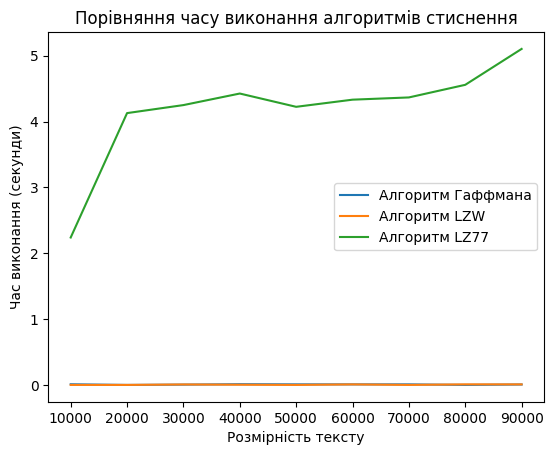

In [71]:
with open('text.txt', "r", encoding='utf-8') as file:
    text = file.read()

algorithm1_time = []
algorithm2_time = []
algorithm3_time = []

for i in range(10000, 100000, 10000):
    text_subset = text[:i]
    start_time = time.time()
    Huffman().encode(text_subset)
    end_time = time.time()
    algorithm1_time.append(end_time - start_time)

    start_time = time.time()
    LZW().encode(text_subset)
    end_time = time.time()
    algorithm2_time.append(end_time - start_time)

    start_time = time.time()
    LZ77(1000).encode(text_subset)
    end_time = time.time()
    algorithm3_time.append(end_time - start_time)

# Побудова графіка
plt.plot(range(10000, 100000, 10000), algorithm1_time, label='Алгоритм Гаффмана')
plt.plot(range(10000, 100000, 10000), algorithm2_time, label='Алгоритм LZW')
plt.plot(range(10000, 100000, 10000), algorithm3_time, label='Алгоритм LZ77')

plt.xlabel('Розмірність тексту')
plt.ylabel('Час виконання (секунди)')
plt.title('Порівняння часу виконання алгоритмів стиснення')
plt.legend()
plt.show()


Бачимо, що LZ77 працює значно повільніше, бо у тексті майже нема повторів слів чи цілих речень, отже він не підходить для стиснення такої інформації.

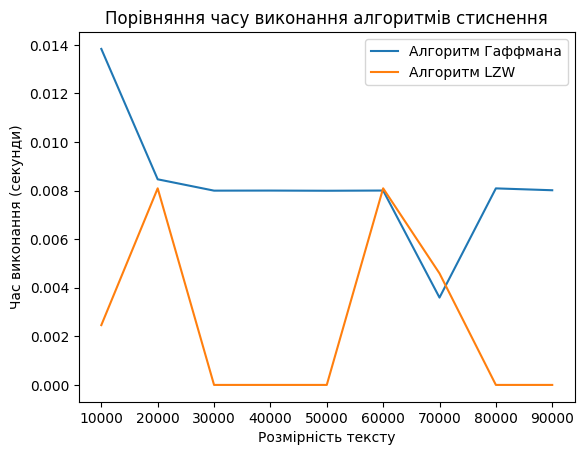

In [72]:
algorithm1_time = []
algorithm2_time = []

for i in range(10000, 100000, 10000):
    text_subset = text[:i]
    start_time = time.time()
    Huffman().encode(text_subset)
    end_time = time.time()
    algorithm1_time.append(end_time - start_time)

    start_time = time.time()
    LZW().encode(text_subset)
    end_time = time.time()
    algorithm2_time.append(end_time - start_time)

# Побудова графіка
plt.plot(range(10000, 100000, 10000), algorithm1_time, label='Алгоритм Гаффмана')
plt.plot(range(10000, 100000, 10000), algorithm2_time, label='Алгоритм LZW')

plt.xlabel('Розмірність тексту')
plt.ylabel('Час виконання (секунди)')
plt.title('Порівняння часу виконання алгоритмів стиснення')
plt.legend()
plt.show()

Найшвидшим є LZW, але вони з Гаффманом мають дуже маленьку різницю, тому тут можна обирати, що більше до вподоби

# --------------------------------------------------------------------------

## Порівняння стиснення

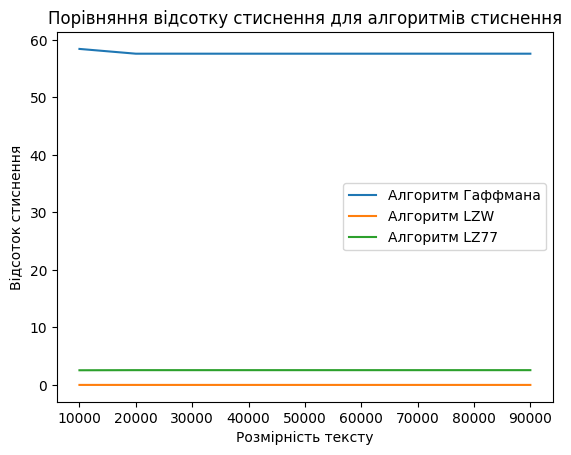

In [73]:
with open('text.txt', "r", encoding='utf-8') as file:
    text = file.read()


algorithm1_compress = []
algorithm2_compress = []
algorithm3_compress = []

for i in range(10000, 100000, 10000):
    text_subset = text[:i]

    ratio = (len(Huffman().encode(text_subset)[0]) / (len(text_subset) * 8)) * 100
    algorithm1_compress.append(ratio)

    ratio = (len(LZW().encode(text_subset)) / (len(text_subset) * 8)) * 100
    algorithm2_compress.append(ratio)

    ratio = (len(LZ77(1000).encode(text_subset)) / (len(text_subset) * 8)) * 100
    algorithm3_compress.append(ratio)

# Побудова графіка
plt.plot(range(10000, 100000, 10000), algorithm1_compress, label='Алгоритм Гаффмана')
plt.plot(range(10000, 100000, 10000), algorithm2_compress, label='Алгоритм LZW')
plt.plot(range(10000, 100000, 10000), algorithm3_compress, label='Алгоритм LZ77')

plt.xlabel('Розмірність тексту')
plt.ylabel('Відсоток стиснення')
plt.title('Порівняння відсотку стиснення для алгоритмів стиснення')
plt.legend()
plt.show()

Найкраще стискає алгоритм Гаффмана, майже 60%. Далі LZ77 та LZW, які не сильно різняться між собою, але суттєво програють Гаффману.